In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
os.chdir('/Users/awxlong/Desktop/my-studies/hpc_exps/')

In [45]:
from torchcam.methods import SmoothGradCAMpp
import h5py
import numpy as np
import pickle
from scipy.stats import rankdata
import pdb
import matplotlib.pyplot as plt

In [12]:
from pytorch_lightning import Trainer
import torch 
from HistoMIL.MODEL.Image.MIL.TransMIL.pl import pl_TransMIL
from HistoMIL.MODEL.Image.MIL.TransMIL.paras import  TransMILParas

from HistoMIL.MODEL.Image.MIL.TransMILMultimodal.pl import pl_TransMILMultimodal
from HistoMIL.MODEL.Image.MIL.TransMILMultimodal.paras import  TransMILMultimodalParas

from HistoMIL.MODEL.Image.MIL.CLAM.pl import pl_CLAM
from HistoMIL.MODEL.Image.MIL.CLAM.paras import  CLAMParas

from HistoMIL.MODEL.Image.MIL.Transformer.pl import pl_Transformer
from HistoMIL.MODEL.Image.MIL.Transformer.paras import  TransformerParas

from HistoMIL.MODEL.Image.MIL.AttentionMIL.pl import pl_AttentionMIL
from HistoMIL.MODEL.Image.MIL.AttentionMIL.paras import  AttentionMILParas


from HistoMIL.MODEL.Image.MIL.DTFD_MIL.pl import pl_DTFD_MIL
from HistoMIL.MODEL.Image.MIL.DTFD_MIL.paras import  DTFD_MILParas


from HistoMIL.MODEL.Image.MIL.CAMIL.pl import pl_CAMIL
from HistoMIL.MODEL.Image.MIL.CAMIL.paras import  CAMILParas


from HistoMIL.MODEL.Image.MIL.TransMILRegression.pl import pl_TransMILRegression
from HistoMIL.MODEL.Image.MIL.TransMILRegression.paras import  TransMILRegressionParas

from HistoMIL.MODEL.Image.MIL.GraphTransformer.pl import pl_GraphTransformer
from HistoMIL.MODEL.Image.MIL.GraphTransformer.paras import GraphTransformerParas

from HistoMIL.DATA.Slide.concepts.WholeSlideImage import WholeSlideImageHeatmap


In [5]:
wsi_object = WholeSlideImageHeatmap(path='/Users/awxlong/Desktop/my-studies/temp_data/CRC/TCGA-CRC/8472de58-9075-4534-b00b-3a87ba2158da/TCGA-AD-6963-01Z-00-DX1.7df2e133-5f24-4c0a-b7f5-5a65fe3420c9.svs')
label = 0
# pkl_path = '/Users/awxlong/Desktop/my-studies/temp_data/CRC/Tissue/tcga_folder_1.TCGA-A8-A085-01Z-00-DX1.2B52D1B8-5AD4-4BD6-ADF7-9D65B8EE2622.svs.pkl'
pkl_path = '/Users/awxlong/Desktop/my-studies/temp_data/CRC/Tissue/8472de58-9075-4534-b00b-3a87ba2158da.TCGA-AD-6963-01Z-00-DX1.7df2e133-5f24-4c0a-b7f5-5a65fe3420c9.svs.pkl'
with open(pkl_path, 'rb') as f:
    wsi_tissue = pickle.load(f)
wsi_coords = h5py.File('/Users/awxlong/Desktop/my-studies/temp_data/CRC/Patch/224_224/8472de58-9075-4534-b00b-3a87ba2158da.TCGA-AD-6963-01Z-00-DX1.7df2e133-5f24-4c0a-b7f5-5a65fe3420c9.svs.h5')
wsi_coords = wsi_coords['coords']

In [6]:
wsi_object.contours_tissue = wsi_tissue['tissue']
wsi_object.holes_tissue = wsi_tissue['holes']

In [70]:
DEFAULT_TRANSMIL_PARAS = TransMILParas()
pl_model = pl_TransMIL(paras=DEFAULT_TRANSMIL_PARAS)
pl_checkpoint = '/Users/awxlong/Desktop/my-studies/hpc_exps/SavedModelsCV5/mil_transmil_uni_32epochs_reruncv=1_epoch=07-auroc_val=0.81.ckpt'

# DEFAULT_CLAM_PARAS = CLAMParas()
# clam = pl_CLAM(paras=DEFAULT_CLAM_PARAS)
# clam_chekpoint = '/Users/awxlong/Desktop/my-studies/hpc_exps/SavedModelsCV5/mil_transmil_uni_32epochs_reruncv=1_epoch=07-auroc_val=0.81.ckpt'
# pl_model = pl_model.load_from_checkpoint(pl_checkpoint)
# clam = clam.load_from_checkpoint('/Users/awxlong/Desktop/my-studies/hpc_exps/SavedModelsCV5/mil_clam_uni_42epochs_cv5cv=1_epoch=14-auroc_val=0.83.ckpt')

# DEFAULT_TRANSFORMER_PARAS = TransformerParas()
# transformer = pl_Transformer(paras=DEFAULT_TRANSFORMER_PARAS)
# transformer = transformer.load_from_checkpoint('/Users/awxlong/Desktop/my-studies/hpc_exps/SavedModelsCV5/mil_transformer_uni_8epochs_smaller_0711_0940cv=2_epoch=07-auroc=0.00.ckpt')

# DEFAULT_ATTMIL_PARAS = AttentionMILParas()
# attmil = pl_AttentionMIL(paras=DEFAULT_ATTMIL_PARAS, dataset_paras=None)
# attmil = attmil.load_from_checkpoint('/Users/awxlong/Desktop/my-studies/hpc_exps/SavedModelsCV5/attentionMIL_uni_32epoch_reruncv=2_epoch=31-auroc_val=0.70.ckpt')


# # DEFAULT_DTFD_PARAS = DTFD_MILParas()
# # dtfd = pl_DTFD_MIL(paras=DEFAULT_DTFD_PARAS)
# # dtfd = dtfd.to(torch.device('cpu'))
# # dtfd = dtfd.load_from_checkpoint('/Users/awxlong/Desktop/my-studies/hpc_exps/SavedModelsCV5/mil_dtfd_uni_42epochs_cv5_multisteplrcv=1_epoch=35-auroc_val=0.84.ckpt', map_location=torch.device('cpu'))

DEFAULT_CAMIL_PARAS = CAMILParas()
camil = pl_CAMIL(paras=DEFAULT_CAMIL_PARAS)
camil = camil.load_from_checkpoint('/Users/awxlong/Desktop/my-studies/hpc_exps/SavedModelsCV5/mil_camil_uni_30epochs_cv5_reducelronplateucv=1_epoch=07-auroc_val=0.82.ckpt')


# DEFAULT_TRANSMILREG_PARAS = TransMILRegressionParas()
# transmil_regression = pl_TransMILRegression(paras=DEFAULT_TRANSMILREG_PARAS)
# transmil_regression = transmil_regression.load_from_checkpoint('/Users/awxlong/Desktop/my-studies/hpc_exps/SavedModelsCV5/mil_transmil_uni_regression_32epochs_cv5_rerun_f1_monitorcv=4_epoch=02-auroc_val=0.39.ckpt')


# DEFAULT_GRAPHTRANSFORMER_PARAS = GraphTransformerParas()
# graphtransformer = pl_GraphTransformer(paras=DEFAULT_GRAPHTRANSFORMER_PARAS)
# graphtransformer = graphtransformer.load_from_checkpoint('/Users/awxlong/Desktop/my-studies/hpc_exps/SavedModelsCV5/mil_graphtransformer_uni_42epochs_cv5_multisteplrcv=2_epoch=00-auroc_val=0.72.ckpt')

DEFAULT_TRANSMILMULTIMODAL_PARAS = TransMILMultimodalParas()
transmilmultimodal = pl_TransMILMultimodal(paras=DEFAULT_TRANSMILMULTIMODAL_PARAS)
transmilmultimodal = transmilmultimodal.load_from_checkpoint('/Users/awxlong/Desktop/my-studies/hpc_exps/SavedModelsCV5/mil_transmil_uni_multimodal_32epochs_cv5cv=1_epoch=13-auroc_val=0.80.ckpt')


HistoMIL - INFO - FeatureNet:: Use: pre-calculated 
HistoMIL - INFO - FeatureNet:: Use: pre-calculated 
HistoMIL - INFO - FeatureNet:: Use: pre-calculated 


Using PPEG positional encoding
Using PPEG positional encoding
Using PPEG positional encoding


In [57]:
# cam_extractor = SmoothGradCAMpp(pl_model.model)

In [71]:
feat_embedding = torch.load('/Users/awxlong/Desktop/my-studies/temp_data/CRC/Feature/uni/8472de58-9075-4534-b00b-3a87ba2158da.TCGA-AD-6963-01Z-00-DX1.7df2e133-5f24-4c0a-b7f5-5a65fe3420c9.svs.pt')
# feat_embedding = torch.load('/Users/awxlong/Desktop/my-studies/temp_data/CRC/Feature/uni/0bdf189f-bfe3-4587-8303-d1905a3822e4.TCGA-F4-6856-01Z-00-DX1.2872c7b5-b94d-4147-ad90-69f88668135a.svs.pt')
# feat_embedding = torch.load('/Users/awxlong/Desktop/my-studies/temp_data/CRC/Feature/uni/35e53d2b-8e11-4e5c-ac45-87ea9a504c4b.TCGA-F5-6812-01Z-00-DX1.47a702ae-cfc6-48ea-8ac0-f9ec194cfb6e.svs.pt')
# feat_embedding = torch.load('/Users/awxlong/Desktop/my-studies/temp_data/CRC/Feature/resnet50/8472de58-9075-4534-b00b-3a87ba2158da.TCGA-AD-6963-01Z-00-DX1.7df2e133-5f24-4c0a-b7f5-5a65fe3420c9.svs.pt')
# feat_embedding = torch.load('/Users/awxlong/Desktop/my-studies/temp_data/CRC/Feature/74a7137c-ea54-477d-a505-2cf147f3cf24.TCGA-AA-A029-01Z-00-DX1.36BA3129-431D-4AE5-98E6-BA064D0B5062.svs.pt')
# feat_embedding = torch.load('/Users/awxlong/Desktop/my-studies/temp_data/CRC/Feature/prov-gigapath/1ce88052-f889-4630-871d-09de5c5ad369.TCGA-NH-A6GB-01Z-00-DX1.AD90C375-54ED-4EE4-A537-59A2E3FE4BCD.svs.pt')
feat_adj_matrix = torch.load('/Users/awxlong/Desktop/my-studies/temp_data/CRC/Feature/resnet50_adj_matrix/8472de58-9075-4534-b00b-3a87ba2158da.TCGA-AD-6963-01Z-00-DX1.7df2e133-5f24-4c0a-b7f5-5a65fe3420c9.svs.pt8472de58-9075-4534-b00b-3a87ba2158da.TCGA-AD-6963-01Z-00-DX1.7df2e133-5f24-4c0a-b7f5-5a65fe3420c9.svs.pt')
clinical_feats = torch.load('/Users/awxlong/Desktop/my-studies/temp_data/CRC/Feature/clinical/test/TCGA-AD-6963.pt')


In [72]:
print(feat_embedding.shape)
feat_embedding[0:3, :]
print(clinical_feats.shape, clinical_feats)
feat_adj_matrix

torch.Size([5668, 1024])
torch.Size([27]) tensor([0.4386, 0.1019, 0.0778, 1.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.0000])


tensor(indices=tensor([[   0,    0,    0,  ..., 5667, 5667, 5667],
                       [   0,    1,    9,  ..., 5665, 5646, 5660]]),
       values=tensor([0.8699, 0.8188, 0.8699,  ..., 0.8725, 0.7761, 0.7711]),
       size=(5668, 5668), nnz=45344, layout=torch.sparse_coo)

In [79]:
clinical_feats.shape

torch.Size([27])

In [60]:
# logits, Y_prob, Y_hat, A, _  = clam.model(feat_embedding[None])
# # A = torch.rand(1, 5668, 512)
# A = A.view(-1, 1).cpu().detach().numpy() 
# A.shape

# logits, Y_prob, Y_hat, A = pl_model.model.infer(feat_embedding[None])

# A.shape

In [61]:
# A.shape


In [62]:
k = 1
with torch.no_grad():
    # logits, Y_prob, Y_hat, A, _  = clam.model(feat_embedding[None])
    # logits, Y_prob, Y_hat, A = pl_model.model.infer(feat_embedding[None])
    # logits, Y_prob, Y_hat, A = transformer.model.infer(feat_embedding[None])
    # logits, Y_prob, Y_hat, A = attmil.model.infer(feat_embedding[None])
    # logits, Y_prob, Y_hat, A = dtfd.model.infer(feat_embedding[None])
    with torch.amp.autocast(device_type='cpu'):
        logits, Y_prob, Y_hat, A = camil.model.infer([feat_embedding[None], feat_adj_matrix])
    # logits, Y_prob, Y_hat, A = transmil_regression.model.infer(feat_embedding[None])
    # logits, Y_prob, Y_hat, A = graphtransformer.model.infer(feat_embedding[None], feat_adj_matrix)
    # logits, Y_prob, Y_hat, A, clinical_gradients = transmilmultimodal.model.infer(feat_embedding[None], clinical_feats)
    



In [73]:
# transmilmultimodal.model = transmilmultimodal.model.to('cpu')
# feat_embedding = feat_embedding.to('cpu')
# clinical_feats = clinical_feats.to('cpu')

In [74]:
logits, Y_prob, Y_hat, (A, clinical_gradients) = transmilmultimodal.model.infer(feat_embedding[None], clinical_feats)

In [34]:
A.shape

(5777, 1)

In [32]:
if A.dim() == 3:
    A = A.mean(-1) # aggregate attention vectors
# Y_hat = Y_hat.item()
A = A.view(-1, 1).cpu().detach().numpy() 
probs, ids = torch.topk(Y_prob, k)
probs = probs[-1].cpu().detach().numpy()
ids = ids[-1].cpu().numpy()
# return ids, preds_str, probs, A as Y_hats, Y_hats_str, Y_probs, A 
Y_hats, Y_probs, A = ids, probs, A

AttributeError: 'numpy.ndarray' object has no attribute 'dim'

In [35]:
A.shape # should be roughly (#Patches e.g. 5668, 1)
feat_adj_matrix.dtype
feat_embedding.dtype

torch.float32

In [36]:
patch_size = (224, 224)
wsi_ref_downsample = wsi_object.level_downsamples[0]
patch_custom_downsample = 1
vis_patch_size = tuple((np.array(patch_size) * np.array(wsi_ref_downsample) * patch_custom_downsample ).astype(int))
vis_patch_size
overlap = 0
top_left = None
bot_right = None

In [37]:
heatmap_vis_args = {'convert_to_percentiles': True, 'blur': True, 'custom_downsample': 1}

In [38]:
def to_percentiles(scores):
    
    scores = rankdata(scores, 'average')/len(scores) * 100   
    return scores

def top_k(scores, k, invert=False):
    if invert:
        top_k_ids=scores.argsort()[:k]
    else:
        top_k_ids=scores.argsort()[::-1][:k]
    return top_k_ids

def screen_coords(scores, coords, top_left, bot_right):
    bot_right = np.array(bot_right)
    top_left = np.array(top_left)
    mask = np.logical_and(np.all(coords >= top_left, axis=1), np.all(coords <= bot_right, axis=1))
    scores = scores[mask]
    coords = coords[mask]
    return scores, coords

def sample_indices(scores, k, start=0.48, end=0.52, convert_to_percentile=False, seed=1):
    np.random.seed(seed)
    if convert_to_percentile:
        end_value = np.quantile(scores, end)
        start_value = np.quantile(scores, start)
    else:
        end_value = end
        start_value = start
    score_window = np.logical_and(scores >= start_value, scores <= end_value)
    indices = np.where(score_window)[0]
    if len(indices) < 1:
        return -1 
    else:
        return np.random.choice(indices, min(k, len(indices)), replace=False)

def sample_rois(scores, coords, k=5, mode='range_sample', seed=1, score_start=0.45, score_end=0.55, top_left=None, bot_right=None):

    if len(scores.shape) == 2:
        scores = scores.flatten()

    scores = to_percentiles(scores)
    if top_left is not None and bot_right is not None:
        scores, coords = screen_coords(scores, coords, top_left, bot_right)

    if mode == 'range_sample':
        sampled_ids = sample_indices(scores, start=score_start, end=score_end, k=k, convert_to_percentile=False, seed=seed)
    elif mode == 'topk':
        sampled_ids = top_k(scores, k, invert=False)
    elif mode == 'reverse_topk':
        sampled_ids = top_k(scores, k, invert=True)
    else:
        raise NotImplementedError
    # pdb.set_trace()
    coords = coords[:][sampled_ids]
    scores = scores[sampled_ids]

    asset = {'sampled_coords': coords, 'sampled_scores': scores}
    return asset

In [39]:
samples = [{'name': 'topk_high_attention', 'sample': True, 'seed': 42, 'k': 15, 'mode': 'topk'}]

In [40]:
# label, Y_hats[0]
sampled_patches_dir = f"/Users/awxlong/Desktop/my-studies/temp_data/CRC/Heatmap/Camil_UNI/"
patch_level = 0
patch_size = (224, 224)
slide_id = 'TCGA-AD-6963'

In [42]:
for sample in samples:
    if sample['sample']:
        tag = "label_{}_pred_{}".format(label, Y_hat)
        sample_save_dir =  os.path.join(sampled_patches_dir, 'sampled_patches', str(tag), sample['name'])
        os.makedirs(sample_save_dir, exist_ok=True)
        print('sampling {}'.format(sample['name']))
        sample_results = sample_rois(scores=A, coords=wsi_coords, k=sample['k'], mode=sample['mode'], seed=sample['seed'], 
            score_start=sample.get('score_start', 0), score_end=sample.get('score_end', 1))
        for idx, (s_coord, s_score) in enumerate(zip(sample_results['sampled_coords'], sample_results['sampled_scores'])):
            print('coord: {} score: {:.3f}'.format(s_coord, s_score))
            patch = wsi_object.wsi.read_region(tuple(s_coord), patch_level, patch_size).convert('RGB')
            patch.save(os.path.join(sample_save_dir, '{}_{}_x_{}_y_{}_a_{:.3f}.png'.format(idx, slide_id, s_coord[0], s_coord[1], s_score)))

sampling topk_high_attention
coord: [21552 16432] score: 100.000
coord: [20432 11952] score: 99.983
coord: [12592  9936] score: 99.965
coord: [14608  9936] score: 99.948
coord: [17072 16208] score: 99.931
coord: [24464 18896] score: 99.913
coord: [11248  7696] score: 99.896
coord: [12816  9040] score: 99.879
coord: [14384  9264] score: 99.862
coord: [10352  5008] score: 99.844
coord: [13488  7472] score: 99.827
coord: [23568 22032] score: 99.810
coord: [11920  7696] score: 99.792
coord: [11920  9712] score: 99.775
coord: [13712  5232] score: 99.758


In [43]:
heatmap = wsi_object.visHeatmap(scores=A, coords=wsi_coords, vis_level=1,  
                                cmap='jet', alpha=0.4, **heatmap_vis_args, 
                                binarize=False, blank_canvas=False,
                                thresh=-1,  patch_size = vis_patch_size,
                                overlap=overlap, top_left=top_left, bot_right = bot_right)


creating heatmap for: 
top_left:  (0, 0) bot_right:  (31655, 25773)
w: 7913, h: 6443
scaled patch size:  [56 56]

computing foreground tissue mask
detected 16947260/50983459 of region as tissue

computing heatmap image
total of 5668 patches
progress: 1132/5668
progress: 2265/5668
progress: 3398/5668
progress: 4531/5668
progress: 5664/5668
Done

computing blend
using block size: 1024 x 1024


In [44]:
heatmap.save(os.path.join('/Users/awxlong/Desktop/my-studies/temp_data/CRC/Heatmap', 'multimodal_heatmap_uni_half_res_gauss_blur.jpg'), quality=100)

In [47]:
clinical_gradients

tensor([-0.0108, -0.0021,  0.0031,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000])

In [77]:
clinical_gradients

tensor([-0.0110, -0.0019,  0.0032,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  0.0000])

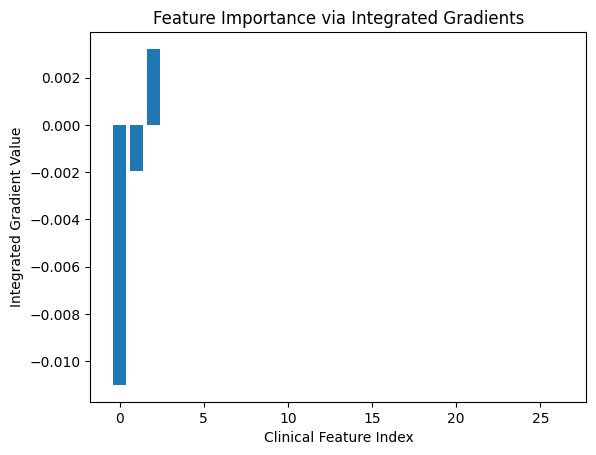

In [76]:
# Plotting
plt.bar(range(len(clinical_gradients)), clinical_gradients)
plt.xlabel('Clinical Feature Index')
plt.ylabel('Integrated Gradient Value')
plt.title('Feature Importance via Integrated Gradients')
plt.show()